请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

作业内容及说明：​​

 题目1（必做）：查看项目中Paddle、PaddleHub版本及模型信息

 题目2 （必做） ：完成1个一键预测任务

 题目3 （必做） ：完成1个迁移学习任务

 题目4 （必做） ：完成1个demo服务化部署任务

 题目5 （选做） ：完成一个AI创意项目，主题不限制，应用hub+能力

# 一、查看版本

In [1]:
#安装最新版本2.1
!pip install paddlehub==2.1.0

import paddle 
import paddlehub as hub

print("Paddle版本号为：")
print(paddle.__version__)
print("Paddlehub版本号为：")
print(hub.__version__)

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


Paddle版本号为：
2.2.2
Paddlehub版本号为：
2.1.0


In [10]:
import paddlehub as hub
model = hub.Module(name="ultra_light_fast_generic_face_detector_1mb_640")
print("模型的版本号为：")
print(model.version)

[2022-03-29 19:16:30,877] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


模型的版本号为：
1.1.2


# 二、一键预测任务——人脸检测

[2022-03-28 13:10:53,250] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object
W0328 13:10:53.253712 13065 analysis_predictor.cc:1350] Deprecated. Please use CreatePredictor instead.


{'data': [{'left': 637.7066040039062, 'right': 1049.853759765625, 'top': 809.3573608398438, 'bottom': 1265.957275390625, 'confidence': 0.9996378421783447}], 'path': './data/871f6d2348f0b5b860a6dbe58.jpeg', 'save_path': 'face_detector_640_predict_output/871f6d2348f0b5b860a6dbe58.jpeg'}


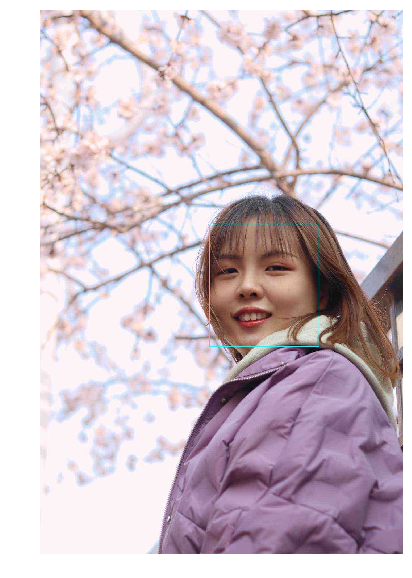

In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline
#人脸检测模型
model = hub.Module(name="ultra_light_fast_generic_face_detector_1mb_640")
#一键预测的照片路径
test_img_path=["./data/871f6d2348f0b5b860a6dbe58.jpeg"]
input_dict = {"image": test_img_path}
#输出人脸检测位置信息
results = model.face_detection(data=input_dict, visualization=True)
for result in results:
    print(result)
# 预测结果展示
img = mpimg.imread("face_detector_640_predict_output/871f6d2348f0b5b860a6dbe58.jpeg")
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

# 三、迁移学习任务

In [ ]:

import paddlehub.vision.transforms as T
from paddlehub.finetune.trainer import Trainer
from paddlehub.datasets import Flowers
import paddle
import paddlehub as hub
#paddle.set_device('gpu')

transforms = T.Compose([T.Resize((256, 256)),
                        T.CenterCrop(224),
                        T.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])],
                        to_rgb=True)


flowers = Flowers(transforms)

flowers_validate = Flowers(transforms, mode='val')

model = hub.Module(name="resnet50_vd_imagenet_ssld", label_list=["roses", "tulips", "daisy", "sunflowers", "dandelion"])
optimizer = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
trainer = Trainer(model, optimizer, checkpoint_dir='img_classification_ckpt')

trainer.train(flowers, epochs=10, batch_size=32, eval_dataset=flowers_validate, save_interval=1)
#trainer.train(flowers, epochs=65, batch_size=32, eval_dataset=None, log_interval=10, save_interval=1)

if __name__ == '__main__':

    model = hub.Module(name='resnet50_vd_imagenet_ssld', label_list=["roses", "tulips", "daisy", "sunflowers", "dandelion"], load_checkpoint='/PATH/TO/CHECKPOINT')
    result = model.predict(['flower.jpg'])



load pretrained parameters success


[2022-03-28 13:11:00,305] [ WARNING] - PaddleHub model checkpoint not found, start from scratch...
[2022-03-28 13:13:47,821] [   TRAIN] - Epoch=1/10, Step=10/92 loss=1.1368 acc=0.5531 lr=0.001000 step/sec=0.06 | ETA 04:16:51
[2022-03-28 13:16:31,466] [   TRAIN] - Epoch=1/10, Step=20/92 loss=0.9998 acc=0.6500 lr=0.001000 step/sec=0.06 | ETA 04:13:53
[2022-03-28 13:19:15,227] [   TRAIN] - Epoch=1/10, Step=30/92 loss=0.8549 acc=0.6969 lr=0.001000 step/sec=0.06 | ETA 04:12:57
[2022-03-28 13:22:00,708] [   TRAIN] - Epoch=1/10, Step=40/92 loss=0.6985 acc=0.7406 lr=0.001000 step/sec=0.06 | ETA 04:13:09
[2022-03-28 13:24:45,570] [   TRAIN] - Epoch=1/10, Step=50/92 loss=0.7038 acc=0.7375 lr=0.001000 step/sec=0.06 | ETA 04:13:04
[2022-03-28 13:27:29,511] [   TRAIN] - Epoch=1/10, Step=60/92 loss=0.7603 acc=0.7250 lr=0.001000 step/sec=0.06 | ETA 04:12:47
[2022-03-28 13:30:14,264] [   TRAIN] - Epoch=1/10, Step=70/92 loss=0.7162 acc=0.7500 lr=0.001000 step/sec=0.06 | ETA 04:12:46
[2022-03-28 13:32:5

# 四、demo服务化部署

In [13]:
!hub serving start -m resnet50_vd_imagenet_ssld

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
W0329 19:22:50.952842 32606 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W03

In [ ]:
import requests
import json
import cv2
import base64

import numpy as np


def cv2_to_base64(image):
    data = cv2.imencode('.jpg', image)[1]
    return base64.b64encode(data.tostring()).decode('utf8')

def base64_to_cv2(b64str):
    data = base64.b64decode(b64str.encode('utf8'))
    data = np.fromstring(data, np.uint8)
    data = cv2.imdecode(data, cv2.IMREAD_COLOR)
    return data

# 发送HTTP请求
org_im = cv2.imread('1234.jpg')

data = {'images':[cv2_to_base64(org_im)], 'top_k':2}
headers = {"Content-type": "application/json"}
url = "http://0.0.0.0:8866/predict/resnet50_vd_imagenet_ssld"
r = requests.post(url=url, headers=headers, data=json.dumps(data))
data =r.json()["results"]['data']

print(data)